In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from sklearn.model_selection import train_test_split

In [91]:
df=pd.read_csv('height-weight.csv')

In [92]:
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


Text(0, 0.5, 'Height')

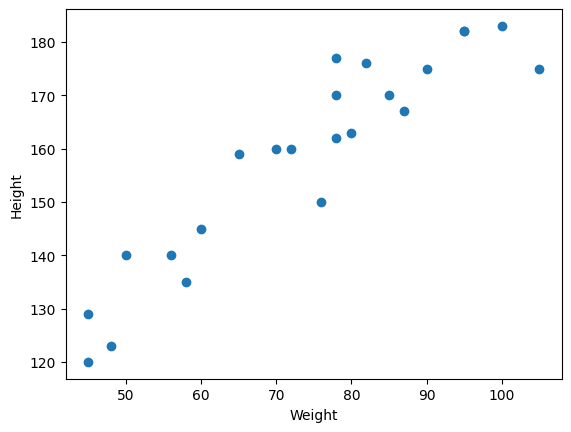

In [93]:
plt.scatter(df['Weight'],df['Height'])
plt.xlabel('Weight')
plt.ylabel('Height')

In [94]:
X=df[['Weight']] ## independent feature
y=df['Height']  ##dependent featute


In [95]:
X.shape,y.shape

((23, 1), (23,))

In [96]:
X_train,X_test,y_train,y_test=train_test_split(X,y, test_size=0.20,random_state=42)

In [97]:
X_train.shape,X_test.shape

((18, 1), (5, 1))

In [98]:
y_train.shape,y_test.shape

((18,), (5,))

In [99]:
from sklearn.preprocessing import StandardScaler

In [100]:
scaler=StandardScaler()

In [101]:
## Always transform test data
## and always fit_transform training data
X_train=scaler.fit_transform(X_train)


In [102]:
X_test=scaler.transform(X_test)

In [103]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

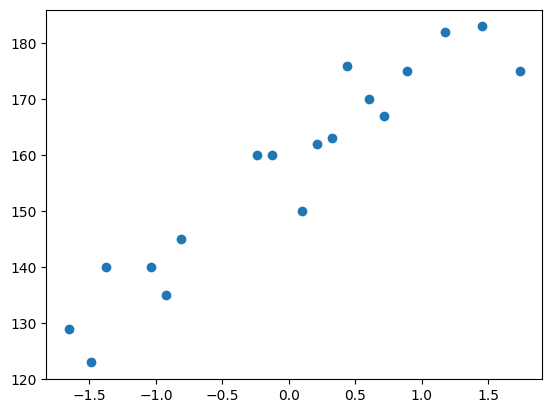

In [104]:
plt.scatter(X_train,y_train)

In [105]:
scaler.transform([[80]])

C:\Users\HP\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([[0.32350772]])

In [106]:
 from sklearn.linear_model import LinearRegression   ##library for linear regression

In [107]:
regressor=LinearRegression()

In [108]:
##training the train data
regressor.fit(X_train,y_train)

LinearRegression()

In [109]:
regressor.intercept_

157.5

In [110]:
regressor.coef_

array([17.03440872])

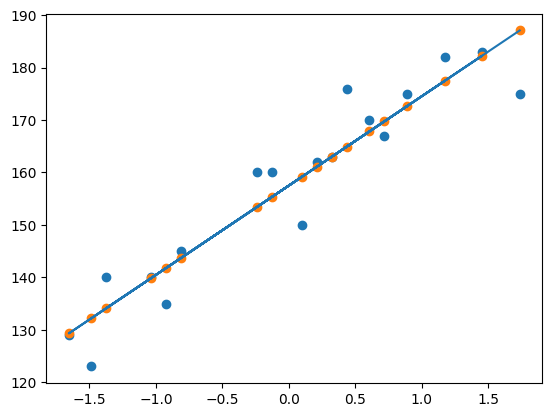

In [111]:
plt.scatter(X_train,y_train)
plt.scatter(X_train,regressor.predict(X_train))
plt.plot(X_train,regressor.predict(X_train))

In [112]:
regressor.predict(X_train)

array([187.0869102 , 141.82375282, 182.27168069, 161.08467086,
       132.19329381, 177.45645118, 129.3041561 , 143.74984463,
       153.38030364, 159.15857905, 134.11938561, 139.89766102,
       155.30639545, 172.64122168, 164.93685446, 167.82599217,
       169.75208397, 163.01076266])

### prediction of train data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_train =157.5 + 17.03(X_train)
          
### prediction of test data
1. predicted height output= intercept +coef_(Weights)
2. y_pred_test =157.5 + 17.03(X_test)

In [113]:
y_pred_test =regressor.predict(X_test)

In [114]:
y_pred_test

array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
       148.56507414])

In [115]:
y_test

15    177
9     170
0     120
8     182
17    159
Name: Height, dtype: int64

In [116]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

## Performance Metrics MAE,MSE,RMSE

In [117]:
from sklearn.metrics import mean_squared_error,mean_absolute_error

In [119]:
mse=mean_squared_error(y_test,y_pred_test)
mae=mean_absolute_error(y_test,y_pred_test)
rmse=np.sqrt(mse)

In [120]:
mse,mae,rmse

(109.77592599051664, 9.822657814519232, 10.477400726827081)

## Accuracy of the model R squared and Adjusted r ssquared
## R square 
Formula

**R^2 = 1 - SSR/SST**


- R^2	=	Accuracy of the model
- SSR	=	sum of squares of residuals
- SST	=	total sum of squares

In [129]:
from sklearn.metrics import r2_score 

In [130]:
score=r2_score(y_test,y_pred_test)
score

0.776986986042344

## Adjusted r square
**Adjusted R2 = 1 – [(1-R2)*(n-1)/(n-k-1)]**

where:

- R2: The R2 of the model
- n: The number of observations
- k: The number of predictor variables

In [131]:
1-(1-score)*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)

0.7026493147231252